##Курсовая работа

#Скачивание данных

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [20]:
anime = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/anime.csv')
rating = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rating.csv')

In [21]:
print('anime.csv (shape):',anime.shape)
print('rating.csv (shape):',rating.shape)

anime.csv (shape): (12294, 7)
rating.csv (shape): (7813737, 3)


In [22]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [23]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


#Фильтрация данных

In [24]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [25]:
anime.fillna({'rating':0},inplace=True)

In [26]:
anime_rating_count = rating.groupby(by='anime_id').count()['rating'].reset_index().rename(columns={'rating':'rating_count'})
anime_rating_count['rating_count'].describe()

count    11200.000000
mean       697.655089
std       2028.627749
min          1.000000
25%          5.000000
50%         51.500000
75%        385.250000
max      39340.000000
Name: rating_count, dtype: float64

In [27]:
filtered_anime = anime_rating_count[anime_rating_count['rating_count']>200]

In [28]:
filtered_anime

,anime_id,rating_count
0,1,15509
1,5,6927
2,6,11077
3,7,2629
4,8,413
...,...,...
11097,33524,473
11112,33558,866
11170,33964,248
11181,34103,822


In [29]:
user_rating_count = rating.groupby(by='user_id').count()['rating'].reset_index().rename(columns={'rating':'rating_count'})
user_rating_count['rating_count'].describe()

count    73515.000000
mean       106.287656
std        153.086558
min          1.000000
25%         18.000000
50%         57.000000
75%        136.000000
max      10227.000000
Name: rating_count, dtype: float64

In [30]:
filtered_user = user_rating_count[user_rating_count['rating_count']>100]

In [31]:
filtered_rating_anime = rating[rating['anime_id'].isin(filtered_anime['anime_id'])]
filtered_rating = filtered_rating_anime[filtered_rating_anime['user_id'].isin(filtered_user['user_id'])]


In [32]:
rating_matrix = filtered_rating.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0)
print(rating_matrix.shape)
rating_matrix

(3583, 24676)


user_id,1,5,7,11,13,14,17,21,29,35,...,73494,73495,73499,73500,73502,73503,73504,73507,73510,73515
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,9.0,0.0,0.0,...,0.0,10.0,9.0,0.0,0.0,9.0,10.0,9.0,0.0,10.0
5,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,9.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,7.0,10.0,8.0,0.0,10.0
6,0.0,8.0,0.0,0.0,-1.0,0.0,7.0,0.0,0.0,0.0,...,9.0,-1.0,9.0,0.0,0.0,9.0,9.0,9.0,0.0,10.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,9.0,0.0,7.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33524,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Построение рейтинговой матрицы

t_1 = [1;2] \\

t_2 = [2,3] \\

t_3 = [3;4] \\

t_4 = [4,5] \\

t_5 = [5,6] \\

t_6 = [6,7] \\

t_7 = [7,8] \\

t_8 = [8,9] \\

t_9 = [9,10] \\


In [33]:
binary_matrixs = []
for i in range(1, 10):
    binary_matrix = pd.DataFrame(False, index=rating_matrix.index, columns=rating_matrix.columns)
    binary_matrix[rating_matrix == i] = True
    binary_matrix[rating_matrix == i+1] = True
    binary_matrixs.append(binary_matrix)




In [17]:

def count_ones(matrix):
    return matrix.sum().sum()
num1 = [count_ones(matrix) for matrix in binary_matrixs]
print(num1)

[28430, 48107, 110693, 294346, 709302, 1568957, 2342242, 2169082, 1532922]


In [ ]:
print(len(binary_matrixs))

9


#Построение бикластеров


In [34]:
!pip install fcapy==0.1.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.9/162.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 54.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=1733b43412e1c68f3c51baf89f46e627e27bf2fa049d04fc0be0f45fb958eda1
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [35]:
from fcapy.lattice import ConceptLattice


from fcapy.context import FormalContext


In [36]:
K = [FormalContext(np.array(bi_matrix, dtype='bool')) for bi_matrix in binary_matrixs]

In [ ]:
MIN_SUPP = 0.02
L = []
for k in K:
     l = ConceptLattice.from_context(k, algo='Sofia', L_max = 1500, min_supp = MIN_SUPP, use_tqdm=True)
     L.append(l)



Iter. Sofia projections:   0%|          | 0/24676 [00:00<?, ?it/s]

Iter. Sofia projections:   0%|          | 0/24676 [00:00<?, ?it/s]

Iter. Sofia projections:   0%|          | 0/24676 [00:00<?, ?it/s]

Iter. Sofia projections:   0%|          | 0/24676 [00:00<?, ?it/s]

Iter. Sofia projections:   0%|          | 0/24676 [00:00<?, ?it/s]

Iter. Sofia projections:   0%|          | 0/24676 [00:00<?, ?it/s]

Iter. Sofia projections:   0%|          | 0/24676 [00:00<?, ?it/s]

In [ ]:
max_area = []
size_l = []
num_bic = []
num_big_bic = []
big_L = []
for l in L:
  area = [len(l[i].extent)*len(l[i].intent) for i in range(len(l))]
  max_area.append(max(area))
  num_bic.append(len(l))
  sizes = []
  big_l = []
  for i in range(len(l)):
     if len(l[i].extent)>2 and len(l[i].intent)>2:
       big_l.append(l[i])
       sizes.append(tuple((len(l[i].extent),len(l[i].intent))))
  big_L.append(big_l)
  size_l.append(sizes)
  num_big_bic.append(len(big_l))



In [ ]:
print(num_bic, num_big_bic)

[29, 47, 132, 719, 1499, 1501, 1501, 1501, 1501] [0, 0, 0, 0, 45, 182, 173, 88, 735]


NameError: ignored

In [ ]:
L[4][4]

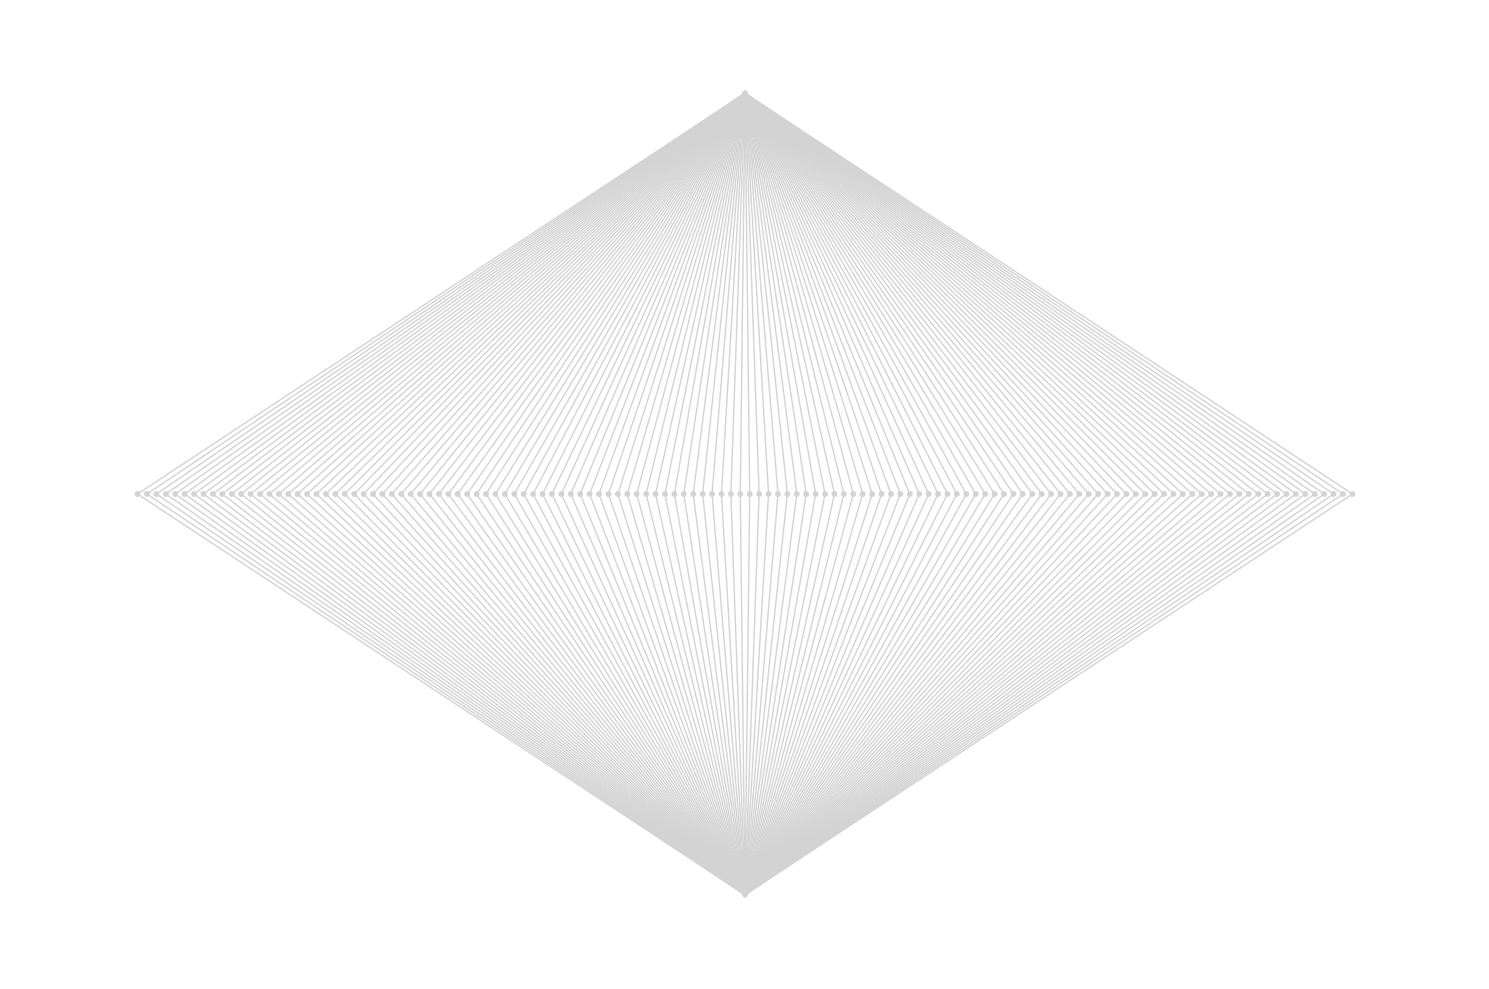

In [ ]:
import matplotlib.pyplot as plt
from fcapy.visualizer import LineVizNx


fig, ax = plt.subplots(figsize=(15,10))

viz = LineVizNx()
viz.draw_concept_lattice(L[2], ax=ax, node_label_func=None, node_size=10)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

viz = LineVizNx()
viz.draw_concept_lattice(big_L[5], ax=ax, node_label_func=None, node_size=10)
plt.tight_layout()
plt.show()

In [ ]:
rating_matrix1 = filtered_rating.pivot_table(index='user_id',columns='anime_id',values='rating').fillna(0)
print(rating_matrix1.shape)
rating_matrix1

(24676, 3583)


anime_id,1,5,6,7,8,15,16,17,18,19,...,33161,33201,33222,33338,33421,33524,33558,33964,34103,34240
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,8.0,0.0,0.0,6.0,0.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73503,9.0,7.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73504,10.0,10.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73507,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
binary_matrixs1 = []
for i in range(1, 10):
    binary_matrix1 = pd.DataFrame(False, index=rating_matrix.index, columns=rating_matrix.columns)
    binary_matrix1[rating_matrix == i] = True
    binary_matrix1[rating_matrix == i+1] = True
    binary_matrixs1.append(binary_matrix)
K1 = [FormalContext(np.array(bi_matrix, dtype='bool')) for bi_matrix in binary_matrixs1]

05, 12 gj 4? 1500
03 better

In [ ]:
MIN_SUPP = 0.05
L = ConceptLattice.from_context(K1[8], algo='Sofia',L_max = 1000, min_supp = MIN_SUPP, use_tqdm=True)

Iter. Sofia projections:   0%|          | 0/24676 [00:00<?, ?it/s]

In [ ]:

area = [len(L[i].extent)*len(L[i].intent) for i in range(len(L))]
for i in range(len(L)):
  if len(L[i].extent)>3 and len(L[i].intent)>3:
    print(len(L[i].extent),len(L[i].intent))
print(len(L), max(area))


201 4
1001 1402


In [ ]:
'''
# Создаем новую пустую матрицу из 0 того же размера
binary_matrix8 = pd.DataFrame(False, index=rating_matrix.index, columns=rating_matrix.columns)

# Заменяем элементы, удовлетворяющие условию, на 1
binary_matrix[rating_matrix > 7] = True
'''

In [ ]:
#K7 = FormalContext(np.array(binary_matrix, dtype='bool'))

In [ ]:
'''
MIN_SUPP = 0.02
L = ConceptLattice.from_context(K7, algo='Sofia', L_max = 1500, min_supp = MIN_SUPP, use_tqdm=True)
'''

In [ ]:
'''
area = [len(L[i].extent)*len(L[i].intent) for i in range(len(L))]
for i in range(len(L)):
  if len(L[i].extent)>4 and len(L[i].intent)>4:
    print(len(L[i].extent),len(L[i].intent))
print(len(L), max(area))
'''

In [ ]:
'''# Создаем новую пустую матрицу из 0 того же размера
binary_matrix89 = pd.DataFrame(False, index=rating_matrix.index, columns=rating_matrix.columns)

# Заменяем элементы, удовлетворяющие условию, на 1
binary_matrix89[rating_matrix == 7] = True
binary_matrix89[rating_matrix == 8] = True
binary_matrix89[rating_matrix == 9] = True
'''

In [ ]:
#K89 = FormalContext(np.array(binary_matrix89, dtype='bool'))

In [ ]:
#MIN_SUPP = 0.05
#L89 = ConceptLattice.from_context(K89, algo='Sofia', L_max = 1500, min_supp = MIN_SUPP, use_tqdm=True)

In [ ]:
'''
area = [len(L89[i].extent)*len(L89[i].intent) for i in range(len(L89))]
for i in range(len(L89)):
  if len(L89[i].extent)>2 and len(L89[i].intent)>2:
    print(len(L89[i].extent),len(L89[i].intent))
print(len(L89), max(area))
'''

In [ ]:
# Создаем новую пустую матрицу из 0 того же размера
'''
binary_matrix78 = pd.DataFrame(False, index=rating_matrix.index, columns=rating_matrix.columns)

# Заменяем элементы, удовлетворяющие условию, на 1
binary_matrix78[rating_matrix == 7] = True
binary_matrix78[rating_matrix == 8] = True
K78 = FormalContext(np.array(binary_matrix78, dtype='bool'))
MIN_SUPP = 0.03
L78 = ConceptLattice.from_context(K78, algo='Sofia', L_max = 1000, min_supp = MIN_SUPP, use_tqdm=True)
'''

In [ ]:
'''
area = [len(L78[i].extent)*len(L78[i].intent) for i in range(len(L78))]
for i in range(len(L78)):
  if len(L78[i].extent)>2 and len(L78[i].intent)>2:
    print(len(L78[i].extent),len(L78[i].intent))
print(len(L78), max(area))
'''